In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
bank = pd.read_csv("C://data science//data sets//bank-full.csv")


In [21]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [22]:
bank.shape

(45211, 17)

In [23]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [24]:
bank.describe(include ="object")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [25]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
bank["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [27]:
bank["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [28]:
bank["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [29]:
bank["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [30]:
bank["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [31]:
bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

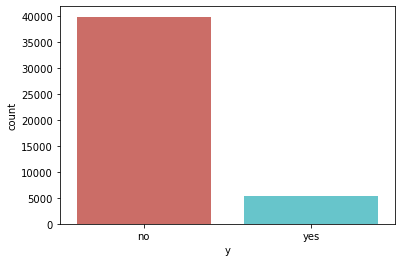

In [32]:
sns.countplot(x='y',data=bank,palette='hls')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

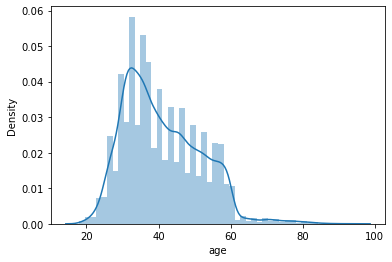

In [33]:
sns.distplot(bank['age'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

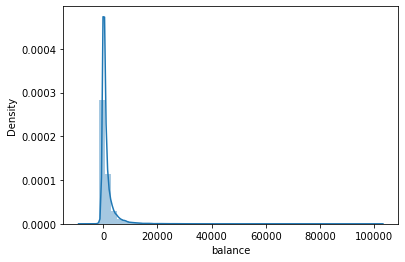

In [34]:
sns.distplot(bank['balance'])

<AxesSubplot:xlabel='day', ylabel='Density'>

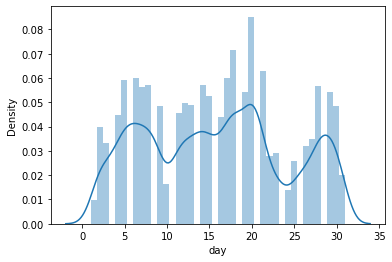

In [35]:
sns.distplot(bank['day'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

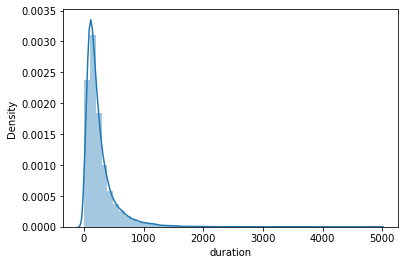

In [37]:
sns.distplot(bank['duration'])


<AxesSubplot:xlabel='campaign', ylabel='Density'>

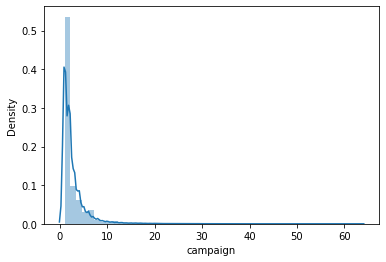

In [36]:
sns.distplot(bank['campaign'])

<AxesSubplot:xlabel='previous', ylabel='Density'>

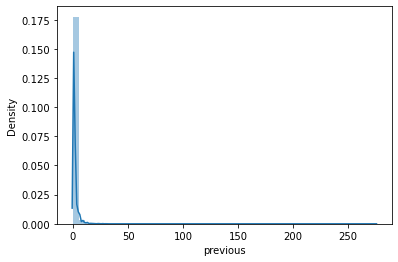

In [37]:
sns.distplot(bank['previous'])

In [38]:
 bank.groupby('age').mean()

,balance,day,duration,campaign,pdays,previous
age,,,,,,
18,372.416667,11.833333,214.166667,1.750000,29.083333,0.500000
19,539.771429,12.514286,175.485714,2.914286,48.685714,0.628571
20,841.940000,16.120000,213.100000,2.120000,48.440000,1.040000
21,866.759494,14.797468,208.658228,1.886076,39.594937,0.594937
22,935.604651,14.682171,234.968992,1.976744,42.751938,0.581395
...,...,...,...,...,...,...
90,356.500000,8.000000,354.500000,2.000000,-1.000000,0.000000
92,775.000000,24.000000,238.500000,3.500000,47.500000,1.500000
93,775.000000,13.000000,668.000000,2.000000,95.000000,8.000000


In [39]:
bank.groupby("duration").mean()

,age,balance,day,campaign,pdays,previous
duration,,,,,,
0,39.666667,2016.000000,21.333333,7.000000,-1.000000,0.000000
1,33.500000,9518.000000,8.000000,1.000000,126.500000,2.000000
2,46.666667,711.666667,9.333333,1.666667,-1.000000,0.000000
3,34.000000,83.750000,18.750000,2.250000,-1.000000,0.000000
4,32.266667,231.933333,16.533333,2.600000,75.933333,0.266667
...,...,...,...,...,...,...
3366,45.000000,66.000000,13.000000,3.000000,-1.000000,0.000000
3422,37.000000,359.000000,7.000000,2.000000,-1.000000,0.000000
3785,45.000000,955.000000,27.000000,1.000000,-1.000000,0.000000


Text(0, 0.5, 'Frequency')

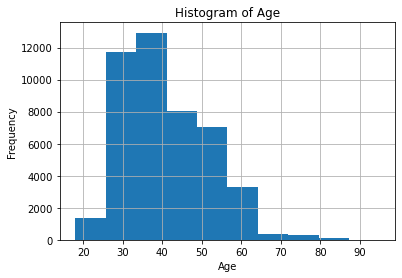

In [40]:
bank.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

<AxesSubplot:>

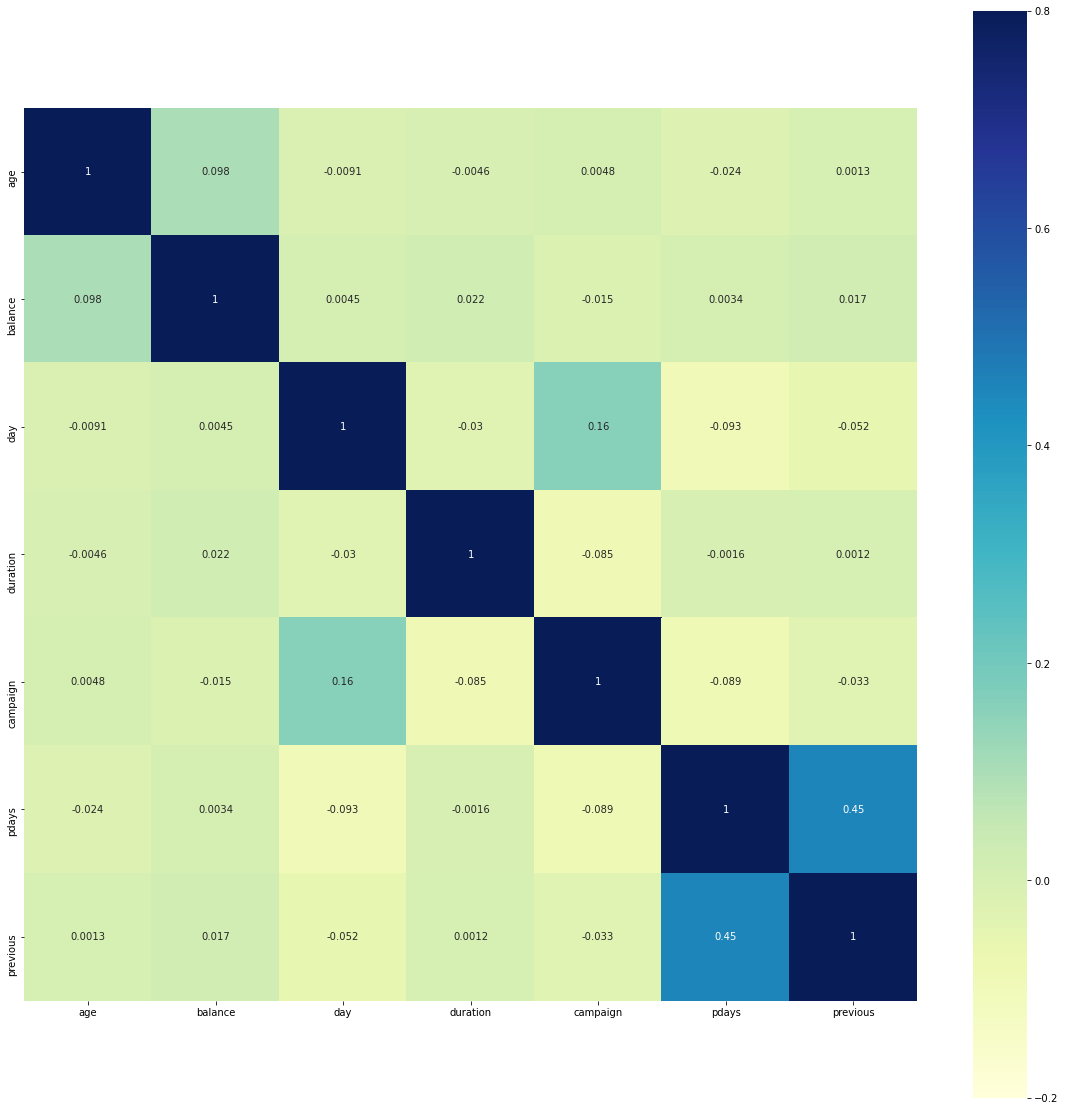

In [41]:
### Correlation Matrix
fig, ax=plt.subplots(figsize=(20,20))
correlation=bank.corr()
sns.heatmap(correlation,square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

In [8]:
### Creating Dummy Variables
bank= pd.get_dummies(bank, drop_first=True)
bank.head(3)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [9]:
### Splitting the data into train and test data set

x=bank.iloc[:,0:42]
y=bank['y_yes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 42)
(9043, 42)
(36168,)
(9043,)


In [45]:
x_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
22162,34,-255,21,179,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35722,41,1428,8,182,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2972,45,141,14,21,10,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4594,38,290,20,369,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
37434,35,8040,13,173,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
y_train.head()

22162    0
35722    0
2972     0
4594     0
37434    0
Name: y_yes, dtype: uint8

In [47]:
y_train.value_counts()

0    31928
1     4240
Name: y_yes, dtype: int64

In [29]:
### Building the Logistic Model
import statsmodels.api as sm
logit_model1 = sm.Logit(y, x)
result=logit_model1.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Sat, 29 May 2021   Pseudo R-squ.:                     inf
Time:                        23:33:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
balance              1.091e-05   4.23e-06      2.580      0.010    2.62e-06    1.92e-05
day    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [30]:
logreg1=LogisticRegression()
logreg1.fit(x_train,y_train)
pred1 = logreg1.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg1.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71251


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_test.value_counts()

0    7994
1    1049
Name: y_yes, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred1)
print(confusion_matrix)

[[5982 1972]
 [2619 5396]]


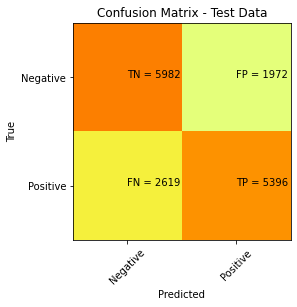

In [32]:
plt.clf()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix[i][j]))
plt.show()

In [53]:
total=sum(sum(confusion_matrix))

sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9057585568917669
Specificity :  0.5924050632911393


In [54]:
fpr, tpr, thresholds = roc_curve(y_test, pred1)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.6014647425034935


In [55]:
### As we can see the area under the curve is 65% which is very less.

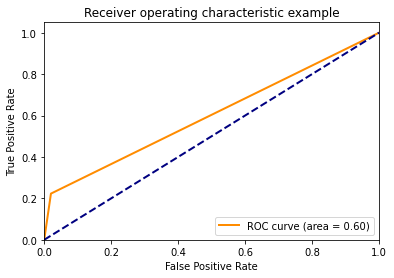

In [56]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.59      0.22      0.32      1049

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [58]:
## Rebuilding the model with only significant variables
cols=['balance', 'day', 'previous', 'job_entrepreneur', 'job_housemaid', 
      'job_management', 'job_self-employed','job_services','job_unknown','education_secondary',
     'education_tertiary','default_yes','contact_telephone','month_dec','month_feb','month_jun',
     'month_oct','poutcome_other'] 
x=bank[cols]
y=bank['y_yes']

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state=10) 

In [60]:
print("x_train:",x_train.shape)
print("y_train",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (36168, 18)
y_train (36168,)
x_test: (9043, 18)
y_test: (9043,)


In [13]:
x_train.head()

,balance,day,previous,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_unknown,education_secondary,education_tertiary,default_yes,contact_telephone,month_dec,month_feb,month_jun,month_oct,poutcome_other
22162,-255,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
35722,1428,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2972,141,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4594,290,20,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
37434,8040,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [61]:
logit_model2=sm.Logit(y_train,x_train)
result=logit_model2.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Results: Logit
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    y_yes              AIC:                inf   
Date:                  2021-05-29 22:44   BIC:                inf   
No. Observations:      36168              Log-Likelihood:     -inf  
Df Model:              17                 LL-Null:            0.0000
Df Residuals:          36150              LLR p-value:        1.0000
Converged:             1.0000             Scale:              1.0000
No. Iterations:        7.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0000   0.0000   2.5797 0.0099  0.0000  0.0000
day                 -0.0706   0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [62]:
logreg2=LogisticRegression()
logreg2.fit(x_train,y_train)
pred2 = logreg2.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg2.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88068


In [64]:
y_test.value_counts()

0    7994
1    1049
Name: y_yes, dtype: int64

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test,pred2)
print(confusion_matrix2)

[[7959   35]
 [1044    5]]


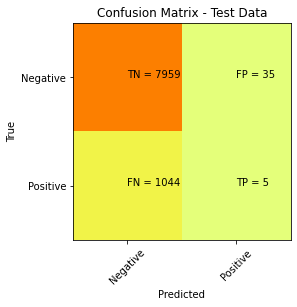

In [66]:
plt.clf()
plt.imshow(confusion_matrix2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix2[i][j]))
plt.show()

In [67]:
sensitivity2 = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity2 )

specificity2 = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity2)

Sensitivity :  0.8840386537820727
Specificity :  0.125


In [68]:
fpr, tpr, thresholds = roc_curve(y_test, pred2)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.500194080259909


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7994
           1       0.12      0.00      0.01      1049

    accuracy                           0.88      9043
   macro avg       0.50      0.50      0.47      9043
weighted avg       0.80      0.88      0.83      9043



In [ ]:
### Rebuilding the model after standardization

In [10]:
cols=['balance', 'day', 'previous', 'job_entrepreneur', 'job_housemaid', 
      'job_management', 'job_self-employed','job_services','job_unknown','education_secondary',
     'education_tertiary','default_yes','contact_telephone','month_dec','month_feb','month_jun',
     'month_oct','poutcome_other'] 
x=bank[cols]
y=bank['y_yes']


In [11]:
x.head()

,balance,day,previous,job_entrepreneur,job_housemaid,job_management,job_self-employed,job_services,job_unknown,education_secondary,education_tertiary,default_yes,contact_telephone,month_dec,month_feb,month_jun,month_oct,poutcome_other
0,2143,5,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,29,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1506,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_std=scaler.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size = .3, random_state=99,stratify=y) 

In [74]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (31647, 18)
y_train: (31647,)
x_test: (13564, 18)
y_test: (13564,)


In [36]:
logit_model3=sm.Logit(y_train,x_train)
result=logit_model3.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                           Results: Logit
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    y_yes              AIC:                inf   
Date:                  2021-05-29 23:34   BIC:                inf   
No. Observations:      63875              Log-Likelihood:     -inf  
Df Model:              17                 LL-Null:            0.0000
Df Residuals:          63857              LLR p-value:        1.0000
Converged:             1.0000             Scale:              1.0000
No. Iterations:        7.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0001   0.0000  27.4451 0.0000  0.0001  0.0001
day                  0.0284   0.0008  37.0516 0.0000  0.0269  0.0299
previous             0.2139   0.0062  34.4874 0.0000  0.2018 

In [37]:
logreg3=LogisticRegression(C=0.001)
logreg3.fit(x_train,y_train)
pred3 = logreg3.predict(x_test)

In [77]:
logreg3

LogisticRegression(C=0.001)

In [78]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg3.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88226


In [79]:
y_test.value_counts()

0    11977
1     1587
Name: y_yes, dtype: int64

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test,pred3)
print(confusion_matrix3)

[[6037 1917]
 [2909 5106]]


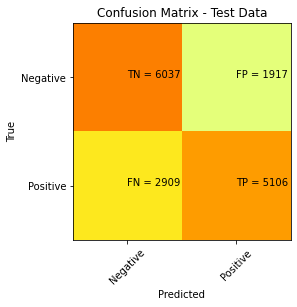

In [39]:
plt.clf()
plt.imshow(confusion_matrix3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix3[i][j]))
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11977
           1       0.29      0.00      0.01      1587

    accuracy                           0.88     13564
   macro avg       0.59      0.50      0.47     13564
weighted avg       0.81      0.88      0.83     13564



In [83]:
## Using SMOTE
x=bank.iloc[:,0:42]
y=bank['y_yes']

In [2]:
 pip install imblearn

In [18]:
from imblearn.over_sampling import SMOTE
y.value_counts()

0    39922
1     5289
Name: y_yes, dtype: int64

In [19]:
smt = SMOTE()
x_smote, y_smote = smt.fit_sample(x, y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_smote,y_smote,test_size = .2, random_state=10) 


In [21]:
np.bincount(y_train)

array([31968, 31907], dtype=int64)

In [22]:
logit_model4=sm.Logit(y_train,x_train)
result=logit_model4.fit()
print(result.summary2())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Results: Logit
Model:                 Logit              Pseudo R-squared:   inf   
Dependent Variable:    y_yes              AIC:                inf   
Date:                  2021-05-29 23:31   BIC:                inf   
No. Observations:      63875              Log-Likelihood:     -inf  
Df Model:              17                 LL-Null:            0.0000
Df Residuals:          63857              LLR p-value:        1.0000
Converged:             1.0000             Scale:              1.0000
No. Iterations:        7.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0001   0.0000  27.4451 0.0000  0.0001  0.0001
day                  0.0284   0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [23]:
logreg4=LogisticRegression()
logreg4.fit(x_train,y_train)
pred4 = logreg4.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg4.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71251


In [25]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=uint8), array([7954, 8015], dtype=int64))

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix4 = confusion_matrix(y_test,pred4)
print(confusion_matrix4)

[[5982 1972]
 [2619 5396]]


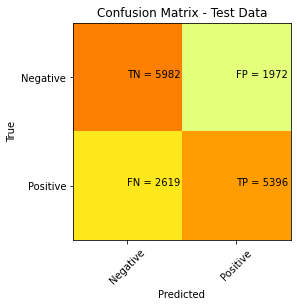

In [41]:
plt.clf()
plt.imshow(confusion_matrix3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(confusion_matrix4[i][j]))
plt.show()

In [42]:
sensitivity4 = confusion_matrix4[0,0]/(confusion_matrix4[0,0]+confusion_matrix4[1,0])
print('Sensitivity : ', sensitivity4 )

specificity4 = confusion_matrix4[1,1]/(confusion_matrix4[1,1]+confusion_matrix4[0,1])
print('Specificity : ', specificity4)

Sensitivity :  0.6955005231949773
Specificity :  0.7323561346362649


In [43]:
fpr, tpr, thresholds = roc_curve(y_test, pred4)
a=auc(fpr,tpr)
print("Area under the curve:",a)

Area under the curve: 0.7126560536559956


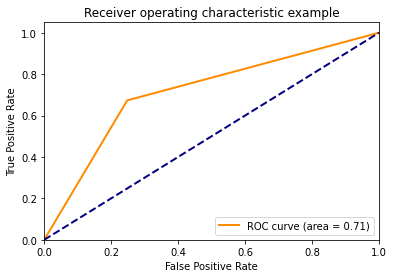

In [44]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      7954
           1       0.73      0.67      0.70      8015

    accuracy                           0.71     15969
   macro avg       0.71      0.71      0.71     15969
weighted avg       0.71      0.71      0.71     15969

